In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


#Basic RNN

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

x_data = np.array([[h]], dtype=np.float32) # x_data = [[[1,0,0,0]]]
print(x_data, "input shape : ", x_data.shape)

# RNN input_dim (4) -> output_dim (2)
hidden_size = 2
inputs = keras.Input(shape=(1, 4)) # shape without batch size

rnn_layer = layers.SimpleRNN(units=hidden_size, return_sequences=True)
outputs = rnn_layer(inputs)

model = keras.Model(inputs=inputs, outputs=outputs)

predictions = model.predict(x_data)
print(predictions, "output shape : ", predictions.shape)

In [ ]:
x_data = np.array([[h, e, l, l, o]], dtype=np.float32)
print(x_data, "input shape : ", x_data.shape)
# RNN input_dim (4) -> output_dim (2). sequence: 5
hidden_size = 2
inputs = keras.Input(shape=(5, 4)) # shape without batch size
rnn_layer = layers.SimpleRNN(units=hidden_size, return_sequences=True)
outputs = rnn_layer(inputs)
model = keras.Model(inputs=inputs, outputs=outputs)
predictions = model.predict(x_data)
print(predictions, "output shape : ", predictions.shape)

In [ ]:
x_data = np.array([[h, e, l, l, o],
                  [e, o, l, l, l],
                  [l, l, e, e, l]], dtype=np.float32)
print(x_data, "input shape : ", x_data.shape)

# RNN input_dim (4) -> output_dim (5). sequence: 5, batch: 3
inputs = keras.Input(shape=(5, 4))

rnn_layer = layers.SimpleRNN(units=hidden_size, return_sequences=True)
outputs = rnn_layer(inputs)

model = keras.Model(inputs=inputs, outputs=outputs)

predictions = model.predict(x_data)
print(predictions, "output shape : ", predictions.shape)

#Simple RNN training

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

idx2char = ['h', 'i', 'e', 'l', 'o']
# Teach hello: hihell -> ihello
x_data = [[0, 1, 0, 2, 3, 3]]  # hihell
y_data = [[1, 0, 2, 3, 3, 4]]  # ihello

num_classes = 5
hidden_size = 5
input_dim = 5  # one-hot size, same as hidden_size to directly predict one-hot
sequence_length = 6  # |ihello| == 6

x_one_hot = np.array([[[1, 0, 0, 0, 0],    # h 0
                       [0, 1, 0, 0, 0],    # i 1
                       [1, 0, 0, 0, 0],    # h 0
                       [0, 0, 1, 0, 0],    # e 2
                       [0, 0, 0, 1, 0],    # l 3
                       [0, 0, 0, 1, 0]]],  # l 3
                     dtype=np.float32)
y_one_hot = tf.keras.utils.to_categorical(y_data, num_classes=num_classes)


inputs = keras.Input(shape=(sequence_length, input_dim)) # shape without batch size

x = layers.LSTM(units=hidden_size, return_sequences=True)(inputs)
dense_layer = layers.Dense(units=num_classes)
outputs = layers.TimeDistributed(dense_layer)(x)

model = keras.Model(inputs=inputs, outputs=outputs)

learning_rate = 0.1
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])


class PrintEveryEpochCallback(tf.keras.callbacks.Callback):    
  def on_epoch_end(self, epoch, logs={}):
    predictions = self.model.predict(x_one_hot)
    predictions = np.argmax(predictions, axis=2)
    
    # print char using dic
    result_str = [idx2char[c] for c in np.squeeze(predictions)]
    print("epoch : %d loss: %.3f prediction : %s true Y: %s" % (epoch, logs['loss'], predictions, y_data))
    print("\tPrediction str: ", ''.join(result_str))

# train
model.fit(x_one_hot, y_one_hot, epochs=50, callbacks=[PrintEveryEpochCallback()], verbose=0)

#Arbitrary Seq Data

In [ ]:
%tensorflow_version 1.x
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

sample = " if you want you"
idx2char = list(set(sample))  # index -> char
char2idx = {c: i for i, c in enumerate(idx2char)}  # char -> idex

sample_idx = [char2idx[c] for c in sample]  # char to index
x_data = [sample_idx[:-1]]  # X data sample (0 ~ n-1)
y_data = [sample_idx[1:]]   # Y label sample (1 ~ n)

# hyper parameters
dic_size = len(char2idx)  # RNN input size (one hot size)
hidden_size = len(char2idx)  # RNN output size
num_classes = len(char2idx)  # final output size (RNN or softmax, etc.)
batch_size = 1  # one sample data, one batch
sequence_length = len(sample) - 1  # number of lstm rollings (unit #)

x_one_hot = tf.keras.utils.to_categorical(x_data, num_classes) 
y_one_hot = tf.keras.utils.to_categorical(y_data, num_classes) 


inputs = keras.Input(shape=(sequence_length, dic_size))

x = layers.LSTM(units=hidden_size, return_sequences=True)(inputs)
outputs = layers.TimeDistributed(layers.Dense(units=num_classes))(x)

model = keras.Model(inputs=inputs, outputs=outputs)

learning_rate = 0.1
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])


class PrintEveryEpochCallback(tf.keras.callbacks.Callback):    
  def on_epoch_end(self, epoch, logs={}):
    predictions = self.model.predict(x_one_hot)
    predictions = np.argmax(predictions, axis=2)
    
    # print char using dic
    result_str = [idx2char[c] for c in np.squeeze(predictions)]
    print("epoch : %d loss: %.3f Prediction str : %s" %(epoch, logs['loss'], ''.join(result_str)))

# train
model.fit(x_one_hot, y_one_hot, epochs=50, callbacks=[PrintEveryEpochCallback()], verbose=0)


#Long Seq data

In [ ]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
sequence_length = 10  # Any arbitrary number

x_data = []
y_data = []
for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x = [char_dic[c] for c in x_str]  # x str to index
    y = [char_dic[c] for c in y_str]  # y str to index

    x_data.append(x)
    y_data.append(y)

x_one_hot = tf.keras.utils.to_categorical(x_data, num_classes) 
y_one_hot = tf.keras.utils.to_categorical(y_data, num_classes) 
print(x_one_hot.shape)

inputs = keras.Input(shape=(sequence_length, data_dim))

x = layers.LSTM(units=hidden_size, return_sequences=True)(inputs)
x = layers.LSTM(units=hidden_size, return_sequences=True)(x)
outputs = layers.TimeDistributed(layers.Dense(units=num_classes))(x)

model = keras.Model(inputs=inputs, outputs=outputs)

learning_rate = 0.1
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])


class PrintEveryEpochCallback(tf.keras.callbacks.Callback):    
  def on_epoch_end(self, epoch, logs={}):
    log_epoch_interval = 10
    if (epoch + 1) % log_epoch_interval == 0:
      predictions = self.model.predict(x_one_hot)

      for j, prediction in enumerate(predictions):
        index = np.argmax(prediction, axis=1)
        print(epoch, j, ''.join([char_set[t] for t in index]), logs['loss'])
    
# train
model.fit(x_one_hot, y_one_hot, epochs=50, callbacks=[PrintEveryEpochCallback()])

predictions = model.predict(x_one_hot)
for j, prediction in enumerate(predictions):
    index = np.argmax(prediction, axis=1)
    if j is 0:  # print all for the first prediction to make a sentence
        print(''.join([char_set[t] for t in index]), end='')
    else:
        print(char_set[index[-1]], end='')

#Time Series

In [ ]:
%tensorflow_version 1.x
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

# train Parameters
seq_length = 7
hidden_dim = 1
data_dim = 5
output_dim = 1

# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)

# train/test split
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence

# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

# build datasets
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        x = time_series[i:i + seq_length, :]
        y = time_series[i + seq_length, [-1]]  # Next close price
        print(x, "->", y)
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

print(trainX.shape)  # (505, 7, 5)
print(trainY.shape)

In [ ]:
inputs = keras.Input(shape=(seq_length, data_dim))

x = tf.keras.layers.LSTM(units=hidden_dim, return_sequences=False)(inputs)
outputs = layers.Dense(units=output_dim)(x)

model = keras.Model(inputs=inputs, outputs=outputs)

class PrintEveryEpochCallback(tf.keras.callbacks.Callback):    
  def on_epoch_end(self, epoch, logs={}):
    log_epoch_interval = 10
    if (epoch + 1) % log_epoch_interval == 0:
      print("epoch: %d, loss: %f" %( epoch, logs['loss']))

learning_rate = 0.01
iterations = 300
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=learning_rate))
model.fit(trainX, trainY, epochs=iterations, callbacks=[PrintEveryEpochCallback()], verbose=0)

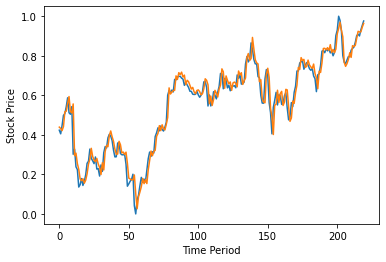

In [ ]:
import matplotlib.pyplot as plt
# Test step
test_predict = model.predict(testX)

# Plot predictions
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()